In [1]:
import numpy as np
import networkx as nx

In [2]:
A1 = np.array([[0, 1, 1],
               [1, 0, 0],
               [1, 0, 0]])
A2 = np.array([[0, 1, 0],
               [1, 0, 1],
               [0, 1, 0]])
A3 = np.array([[0, 0, 1],
               [0, 0, 1],
               [1, 1, 0]])

In [3]:
val1, vec1 = np.linalg.eig(A1)
val1.round(3)

array([ 1.414, -1.414,  0.   ])

In [4]:
vec1.round(2)

array([[ 0.71,  0.71,  0.  ],
       [ 0.5 , -0.5 , -0.71],
       [ 0.5 , -0.5 ,  0.71]])

In [5]:
val2, vec2 = np.linalg.eig(A2)
val2.round(3)

array([-1.414, -0.   ,  1.414])

In [6]:
vec2.round(2)

array([[ 0.5 ,  0.71,  0.5 ],
       [-0.71, -0.  ,  0.71],
       [ 0.5 , -0.71,  0.5 ]])

In [7]:
val3, vec3 = np.linalg.eig(A3)
val3.round(3)

array([-1.414, -0.   ,  1.414])

In [8]:
vec3.round(2)

array([[ 0.5 , -0.71, -0.5 ],
       [ 0.5 ,  0.71, -0.5 ],
       [-0.71,  0.  , -0.71]])

In [25]:
G1 = nx.path_graph(4)
G2 = nx.path_graph(4)
nx.vf2pp_is_isomorphic(G1, G2, node_label=None)
nx.vf2pp_isomorphism(G1, G2, node_label=None)

{1: 1, 2: 2, 0: 0, 3: 3}

In [54]:
nx.adjacency_matrix(G1).toarray()

array([[0, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0]])

In [55]:
nx.adjacency_matrix(G2).toarray()

array([[0, 1, 0, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 0, 1, 0]])

In [57]:
G1.nodes

NodeView((0, 1, 2, 3))

In [35]:
G1 = nx.path_graph(4)
G2 = nx.path_graph(4)
mapped = {1: 2, 2: 1, 3: 0, 0: 3}
nx.set_node_attributes(G1, dict(zip(G1, ["blue", "red", "green", "yellow"])), "label")
nx.set_node_attributes(G2, dict(zip([mapped[u] for u in G1], ["blue", "red", "green", "yellow"])), "label")
nx.vf2pp_is_isomorphic(G1, G2, node_label="label")


True

In [53]:
nx.vf2pp_isomorphism(G1, G2, node_label="label")

In [58]:
G1 = nx.path_graph(4)
G2 = nx.path_graph(4)
mapped = {1: 1, 2: 3, 3: 2, 0: 0}
nx.set_node_attributes(G1, dict(zip(G1, ["blue", "red", "green", "yellow"])), "label")
nx.set_node_attributes(G2, dict(zip([mapped[u] for u in G1], ["blue", "red", "green", "yellow"])), "label")
nx.vf2pp_is_isomorphic(G1, G2, node_label="label")


False

In [59]:
isos = list(nx.vf2pp_all_isomorphisms(G1, G2))

In [60]:
isos

[{1: 1, 2: 2, 0: 0, 3: 3}, {1: 2, 2: 1, 0: 3, 3: 0}]

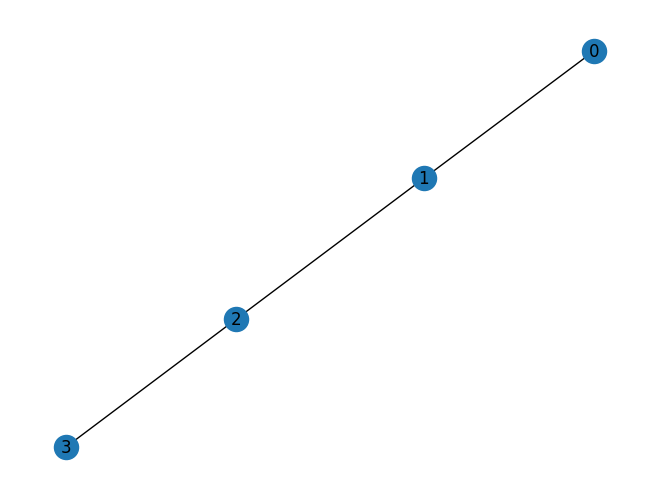

In [42]:
nx.draw(G2, with_labels = True)

In [23]:
dict(zip([mapped[u] for u in G1], ["blue", "red", "green", "yellow"]))

{0: 'blue', 1: 'red', 2: 'green', 3: 'yellow'}